In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../../data/CA-GrQc.txt',sep = "\t")
data.columns=['Item0','Item1']
data = data.dropna()
print(data)

       Item0  Item1
0       3466   5233
1       3466   8579
2       3466  10310
3       3466  15931
4       3466  17038
...      ...    ...
28974  10154   9224
28975  10154  16830
28976  11113  21723
28977  11113  23836
28978  11113  25050

[28979 rows x 2 columns]


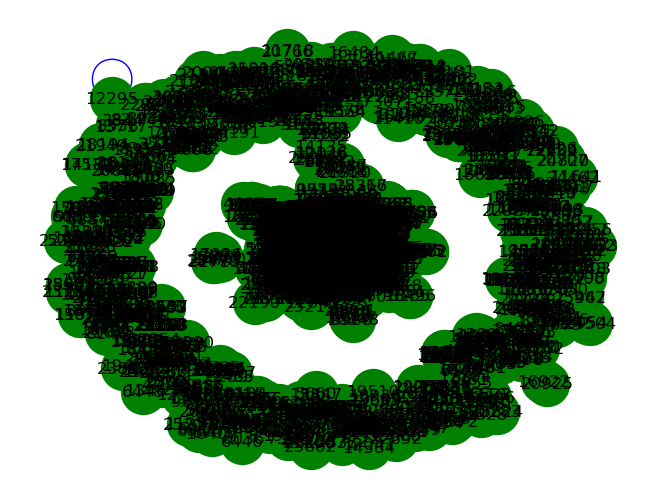

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
for index, row in data.iterrows():
    Item0_id = row['Item0']
    Item1_id = row['Item1']
    G.add_edge(Item0_id,Item1_id)

nx.draw(G, with_labels=True, edge_color='b', node_color='g', node_size=1000)
plt.show()

In [4]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [5]:
# 将数据集转换成适合Apriori算法处理的形式
item_data = []
last_item = 0
tmp = []

for index, row in data.iterrows():
    item0_id = row['Item0']
    item1_id = row['Item1']
    if item0_id == last_item:
        tmp.append(item1_id)
    else:
        item_data.append(tmp)
        tmp = []
        tmp.append(item1_id)
    last_item = item0_id

item_data.append(tmp)

item_data

te = TransactionEncoder()
data_encoded = te.fit_transform(item_data)
df = pd.DataFrame(data_encoded, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.011, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.012397,(2741)
1,0.012970,(6610)
2,0.012970,(9785)
3,0.014686,(12365)
4,0.011444,(14807)
5,0.011825,(15003)
6,0.011253,(15244)
7,0.012588,(17655)
8,0.012016,(19423)
9,0.015449,(21012)


(21012,2741),(15003,21508),(22691,21012)为频繁项集，在论文作者网络中，我们将其称为共作模式。

In [6]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(21012),(2741),0.015449,0.012397,0.011444,0.740741,59.749288,0.011252,3.809324,0.998692
1,(2741),(21012),0.012397,0.015449,0.011444,0.923077,59.749288,0.011252,12.799161,0.995606
2,(15003),(21508),0.011825,0.012779,0.011062,0.935484,73.205104,0.010911,15.301926,0.998143
3,(21508),(15003),0.012779,0.011825,0.011062,0.865672,73.205104,0.010911,7.356412,0.999107
4,(22691),(21012),0.014686,0.015449,0.011635,0.792208,51.278339,0.011408,4.738151,0.995113
5,(21012),(22691),0.015449,0.014686,0.011635,0.753086,51.278339,0.011408,3.990521,0.995884


如表所示，置信度与提升度最高的关联规则为15003->21508.

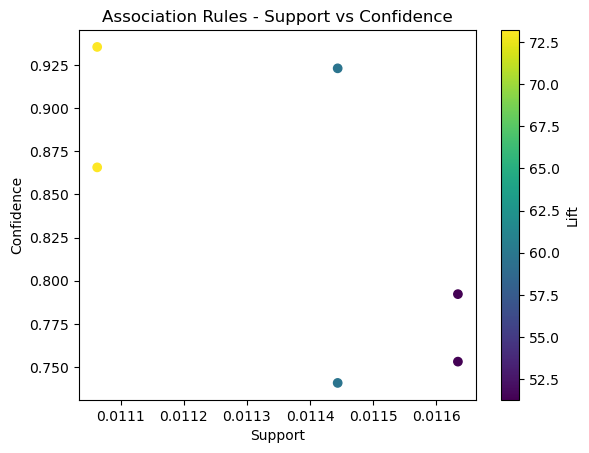

In [8]:
# 绘制散点图
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules - Support vs Confidence')
plt.show()


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../../data/p2p-Gnutella08.txt',sep = "\t")
data.columns=['Item0','Item1']
data = data.dropna()
print(data)

       Item0  Item1
0          0      2
1          0      3
2          0      4
3          0      5
4          0      6
...      ...    ...
20771   6296   5076
20772   6296   5236
20773   6296   6297
20774   6296   6298
20775   6296   6299

[20776 rows x 2 columns]


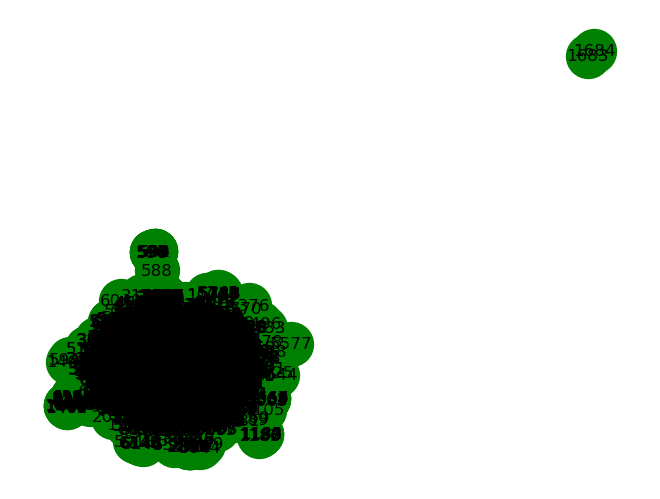

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
for index, row in data.iterrows():
    Item0_id = row['Item0']
    Item1_id = row['Item1']
    G.add_edge(Item0_id,Item1_id)

nx.draw(G, with_labels=True, edge_color='b', node_color='g', node_size=1000)
plt.show()

In [4]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [5]:
# 将数据集转换成适合Apriori算法处理的形式
item_data = []
last_item = 0
tmp = []

for index, row in data.iterrows():
    item0_id = row['Item0']
    item1_id = row['Item1']
    if item0_id == last_item:
        tmp.append(item1_id)
    else:
        item_data.append(tmp)
        tmp = []
        tmp.append(item1_id)
    last_item = item0_id

item_data.append(tmp)

item_data

te = TransactionEncoder()
data_encoded = te.fit_transform(item_data)
df = pd.DataFrame(data_encoded, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.012, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.031237,(3)
1,0.023935,(4)
2,0.029615,(5)
3,0.020690,(7)
4,0.030020,(8)
...,...,...
57,0.025152,(1245)
58,0.032049,(1317)
59,0.014199,(2001)
60,0.017850,(2018)


(249,251)为频繁项集，在p2p网络中，我们将其称为联机模式。

In [6]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(249),(251),0.033266,0.032860,0.012576,0.378049,11.504818,0.011483,1.555009,0.944499
1,(251),(249),0.032860,0.033266,0.012576,0.382716,11.504818,0.011483,1.566110,0.944103


In [ ]:
如表所示，置信度与提升度最高的关联规则为251->249.

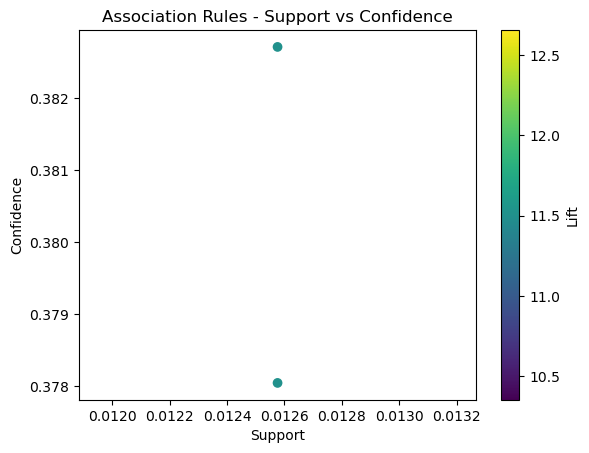

In [7]:
# 绘制散点图
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules - Support vs Confidence')
plt.show()
